<a href="https://colab.research.google.com/github/7430souvik/souvik/blob/main/multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# show the first training examples
print(f"Training samples:\n {train_data[0]}\n")
print(f"training label:\n{train_labels[0]}\n")

Training samples:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [5]:
# checking the shape of a single example
train_data[0].shape,train_labels[0].shape

((28, 28), ())

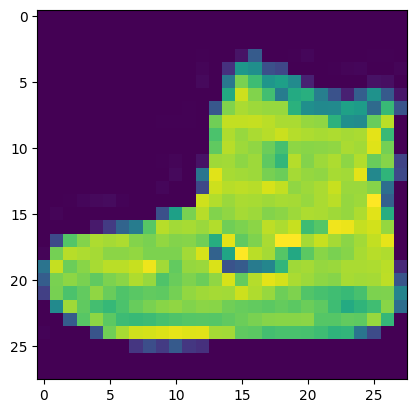

In [6]:
# plot a single sample
plt.imshow(train_data[0]);

In [7]:
# check out sample labels
train_labels[7]

2

In [10]:
# create a small list so we can index onto our labels so they are human readable

class_names = ["T_shirt/top","Trouser","pull over", "Dress","coat","sandal", "shirt", "Sneaker", "Bag","ankle boot"]

In [11]:
len(class_names)

10

Text(0.5, 1.0, 'coat')

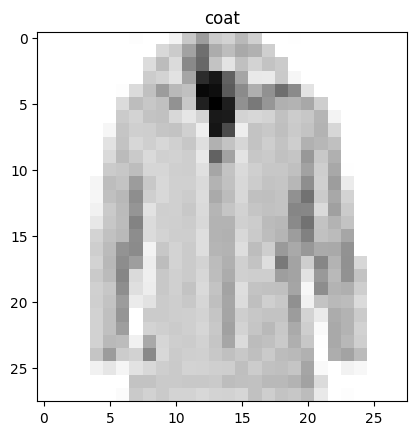

In [12]:
# plot an example of image and its label
index_of_choice= 19
plt .imshow(train_data[index_of_choice],
            cmap= plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

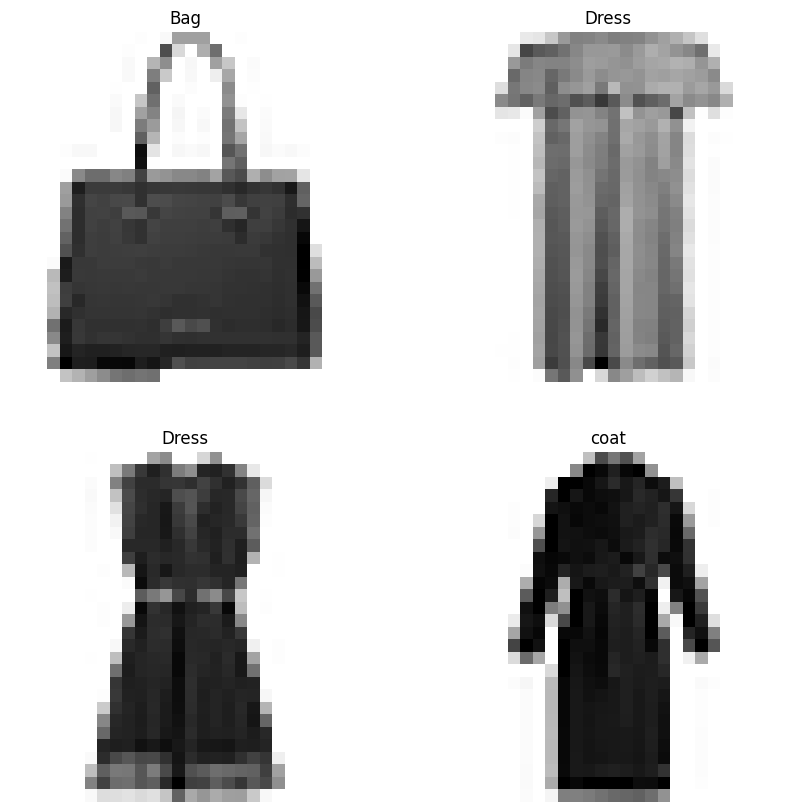

In [13]:
# plot multiple random images for fashion mnist

import random
plt.figure(figsize=(10,10))
for i in range(4):
  ax= plt.subplot(2,2,i+1)
  rand_index= random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [14]:
test_data.shape

(10000, 28, 28)

In [ ]:
train_data.shape

(60000, 28, 28)

In [15]:
# check the minimum and maximum values of training data
train_data.min(), train_data.max()

(0, 255)

In [16]:
# we can get our training and testing data between 0 & 1 by dividing by maximum

train_data_norm= train_data/255.0
test_data_norm= test_data/255.0

In [17]:
# now check the min and max values of the scaled training data

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [18]:
# now our data is normalized lets build a model to find patterns in it

# set random seed
tf.random.set_seed(42)

# craete a model
model_14= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"] )
# fit the model
norm_history= model_14.fit(train_data_norm, train_labels,
                           epochs=10,
                           validation_data=(test_data_norm,test_labels))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4415 - loss: 1.5278 - val_accuracy: 0.6997 - val_loss: 0.9153
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7248 - loss: 0.8243 - val_accuracy: 0.7771 - val_loss: 0.6627
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7882 - loss: 0.6301 - val_accuracy: 0.7854 - val_loss: 0.6260
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7964 - loss: 0.5958 - val_accuracy: 0.7878 - val_loss: 0.6098
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7996 - loss: 0.5785 - val_accuracy: 0.7902 - val_loss: 0.6010
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8027 - loss: 0.5672 - val_accuracy: 0.7936 - val_loss: 0.5952
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8063 - loss: 0.5590 - val_accuracy: 0.7955 - val_loss: 0.5903
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8087 - loss: 0.5528 - 

In [19]:
# create our confusion metrix

import itertools
from sklearn.metrics import confusion_matrix
def make_confusion_matrix (y_true, y_pred, classes=None, figsize=(10,10), text_size=15):


  cm= confusion_matrix(y_true, y_pred)
  cm_norm= cm.astype("float")/cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes= cm.shape[0]

  # lets prettify it
  fig ,ax = plt.subplots(figsize=figsize)

  # create a matrix plot
  cax= ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  # set labels to the classes
  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])
  # label the axes
  ax.set(title= "confusion Matrix",
         xlabel="prediction label",
         ylabel= "True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)
  # set x axis labels to bottom
  ax.xaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # set y axis labels size
  ax.yaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # set threshold for different colors
  threshold= (cm.max() + cm.min())/2

  # plot the text in each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [20]:
# make predictions with our model
y_probs= model_14.predict(test_data_norm) # prob is for prediction probabilities


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [21]:
# view  the first five predictions
y_probs[:5]

array([[4.18798060e-14, 2.81352495e-05, 2.31631048e-10, 2.17867079e-11,
        6.13621451e-05, 2.71232098e-01, 1.74883730e-09, 1.40832841e-01,
        7.60195974e-07, 5.87844789e-01],
       [6.61215454e-04, 2.92138047e-09, 7.97906399e-01, 1.18623193e-05,
        4.52007866e-03, 4.03031719e-24, 1.96900070e-01, 1.68393297e-35,
        4.12669664e-07, 4.29463594e-14],
       [4.98996296e-11, 9.99911129e-01, 2.49296363e-07, 4.24136633e-05,
        4.59380644e-05, 6.95554827e-15, 1.98635308e-09, 3.31707675e-08,
        2.10244695e-15, 2.26738123e-07],
       [4.40551979e-12, 9.99963820e-01, 7.76236959e-08, 3.09600946e-05,
        5.02470812e-06, 8.62984996e-20, 9.94714172e-11, 1.01614325e-11,
        9.12416198e-19, 9.23633559e-10],
       [8.39051902e-02, 7.80977134e-05, 2.50698864e-01, 2.18087733e-02,
        5.36115728e-02, 2.69483857e-09, 5.87475300e-01, 1.72282148e-14,
        2.42193323e-03, 2.76356900e-07]], dtype=float32)

In [22]:
y_probs[7] , tf.argmax(y_probs[7])
class_names [ tf.argmax(y_probs[7])]

'shirt'

In [23]:
# covert all prediction probabilities into integers

y_preds= y_probs.argmax(axis=1)

# view the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [24]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true= test_labels,
                 y_pred=y_preds)

array([[728,   0,  13, 106,   7,   2, 125,   0,  19,   0],
       [  0, 959,   3,  22,  12,   0,   3,   0,   1,   0],
       [ 13,   6, 618,  23, 186,   0, 153,   0,   1,   0],
       [ 40,  46,  14, 796,  41,   2,  58,   0,   3,   0],
       [  1,  16, 100,  26, 771,   2,  82,   0,   2,   0],
       [  0,   0,   0,   0,   1, 873,   1,  61,   6,  58],
       [151,   2, 113,  55, 142,   4, 509,   0,  24,   0],
       [  0,   0,   0,   0,   0,  31,   0, 933,   0,  36],
       [  3,   1,   1,   7,   7,  35,  51,   4, 890,   1],
       [  0,   0,   0,   0,   0,  20,   0,  87,   1, 892]])

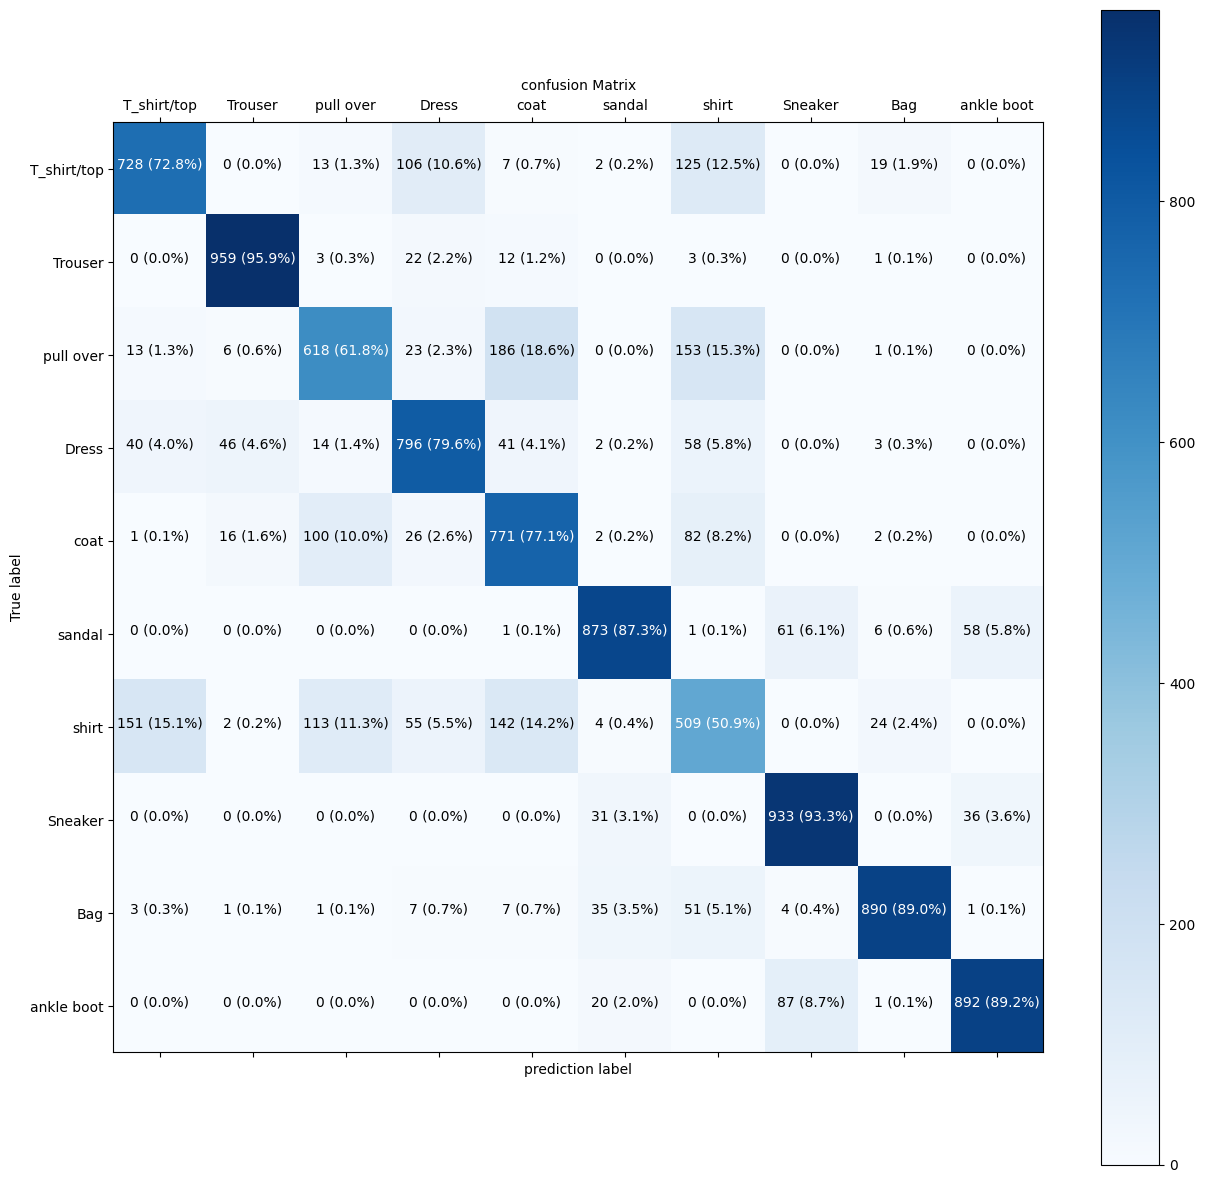

In [26]:
# make a prettier confusion matrix
make_confusion_matrix(y_true= test_labels,
                       y_pred=y_preds,
                       classes=class_names,
                       figsize=(15,15),
                       text_size=10)

In [45]:
import random
def plot_random_image(model, images, true_labels, classes):
  """
  picks a random image  and plots it and labels it with a prediction and truth label
  """
  # setup random integer
  i= random.randint(0, len(images))

  # create predictions and targets
  target_images = images[i]
  pred_probs= model_14.predict(target_images.reshape(1, 28,28))

  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot the image
  plt.imshow( target_images, cmap= plt.cm.binary)

  # change the color ofthe titles depending if the prdiction is right or wrong

  if pred_label == true_label:
    color="green"
  else:
    color="red"

# add x label information(predictin/true label)

  plt.xlabel("pred:{}{:2.0f}%(True:{})".format(pred_label, 100* tf.reduce_max(pred_probs), true_label),color=color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


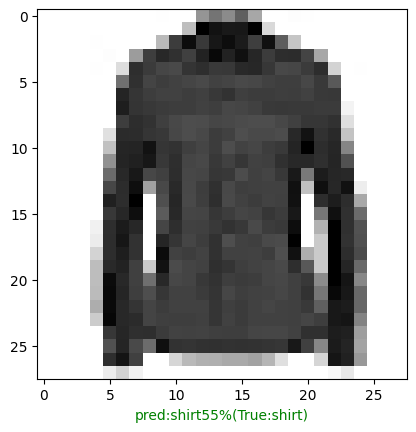

In [47]:
# check the random image as well as predictions
plot_random_image(model= model_14,
                  images= test_data_norm,
                  true_labels= test_labels,
                  classes= class_names)